Examples per thread: 35
Thread 0 spawned
Thread 1 spawned
Thread 2 spawned
Thread 3 spawnedThread 0 finished

Thread 1 finished
Thread 2 finished
Thread 3 finished
Finished in 0:00:00.020266


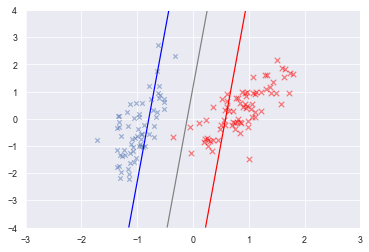

In [1]:
## Dataset tiny
import matplotlib.pyplot as plt
from DataLoader import *
from LinearSVM import *
from LinearSVMUnified import LinearSVMUnified
from SGD import *
from LinearSVMParallel import *
dataloader = DataLoader()

# Tiny
xtrain, xtest, ytrain, ytest = dataloader.get_toydata_tiny()
lr = 0.1
C = 0.001
svm = LinearSVMParallel(lr=lr, C=C, tqdm_toggle=True, show_plot=True)
svm.fit(xtrain, ytrain)

Examples per thread: 35
Thread 0 spawned
Thread 1 spawned
Thread 2 spawnedThread 3 spawned

Thread 0 finishedThread 2 finished

Thread 3 finished
Thread 1 finished
Finished in 0:00:00.021686


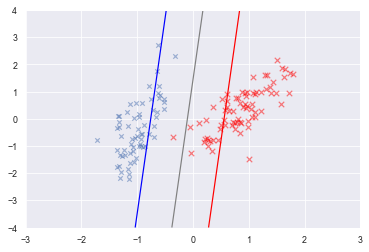

In [3]:
svm = LinearSVMUnified(learning_rate=lr, regularization=C, show_plot=True, thread_count=1)
svm.fit(xtrain, ytrain)